In [2]:
try:
    4/0
except Exception:
    print("I am not stupid")

I am not stupid


In [5]:
eval("1")

1

In [10]:
type(Exception)
a = list("xx")
type(a)

list

In [13]:
class Person:
    def __init__(self,name): #constructor arguments go here
        # set up the state of your class instance
        self.name =  name
    def greet(self):
        print("Hello, %s"%self.name)
perseron = Person("John")
perseron.greet()  
    #methods go here
    #they always have at least one argument, and the first argument is named `self`

Hello, John


In [19]:
class Person:
    def __init__(self,name): #constructor arguments go here
        # set up the state of your class instance
        self.name =  name
    def greet(self):
        print("Hello, %s"%self.name)

In [25]:
class SymmetricDict():
    def __init__(self):
        self.dictionary = {}
    def __setitem__(self, key, value):
        self.dictionary[key] = value
    def __getitem__(self, key):
        return self.dictionary[key]

sym_dict = SymmetricDict()
sym_dict["Matt"] = "Data Scientist"
sym_dict["Matt"]

'Data Scientist'

In [ ]:
$ f = LinearPolynomial(m=2, b=1)
$ g = LinearPolynomial(m=-4, b=4)
$ print(f)
2x+1
$ print(g)
-4x+4
$ f.evaluate(0)
1
$ f.evaluate(2)
5
$ g.evaluate(0)
4
$ g.evaluate(1)
0

In [61]:
class LinearPolynomial:
    def __init__(self,m,b):
        self.m = m
        self.b = b
    def __add__(self, other):
        m = self.m + other.m
        b = self.b + other.b
        #return self.m, self.b
        return LinearPolynomial(m,b)
    def __sub__(self, other):
        m = self.m - other.m
        b = self.b - other.b
        return LinearPolynomial(m,b)
    def __eq__(self,other):
        return self.m == other.m    
    def __str__(self):
        return str(self.m)+"x+" +str(self.b)
    def evaluate(self,x):
        return (self.m * x) + self.b

f = LinearPolynomial(m=2, b=1)
g = LinearPolynomial(m=-4, b=4)

x = f - g
print(x)

6x+-3


In [64]:
class sth:
    def me():
        pass
sth == sth

True

In [142]:
import string
class PasswordValidator:
    ## when putting nothing for contains_capital or contains_number, it switch off.
    ## so they have to be False
    def __init__(self, contains_capital=False,contains_number=False,symbols=[]):
        self.symbols = symbols
        self.contains_capital = contains_capital
        self.contains_number = contains_number
        
    def validate(self, strings):

        symbo_check =  len(set(self.symbols) - set(list(strings))) != len(self.symbols)
        
        if self.contains_capital == True:
            capit_check =  len(set(list(string.ascii_uppercase)) -  set(list(strings))) != len(list(string.ascii_uppercase))
        else:
            capit_check = True 
            ## when self.contains_capital == False, assuming it was true so that "&" in return works
        
        if self.contains_number == True:
            num = ["0","1","2","3","4","5","6","7","8","9"]
            num_check = len(set(num) - set(list(strings))) != len(num)
        else:
            num_check = True
        
        return (symbo_check&capit_check&num_check)

validator = PasswordValidator(symbols=['!', '?', '#'])
validator.validate('moshi?')

True

In [170]:
import numpy as np
class VectorSegmenter:
    def __init__(self, a_list):
        self.a_list = a_list
    def segment(self,bool_list):
        self.new_list = [self.a_list[i] for i in range(len(self.a_list)) if bool_list[i] == True]
        return self.new_list
    def sum(self,bool_list):
        return sum(self.new_list,bool_list)
    def average(self,bool_list):
        return np.mean(self.new_list)

v = VectorSegmenter([1, 2, 3, 4, 5, 6])
v.segment([True, True, False, False, True, True])
v.average([True, True, False, False, True, True])


3.5

In [ ]:
$ room = DungeonRoom(10, 10)

$ room.add_rectangle(1, 2, 5, 6)

$ room.print_room()

In [188]:
x = [1,2,3,4,5,5,6]
x[3:6] = ['#'] *3
x

[1, 2, 3, '#', '#', '#', 6]

In [268]:
#print(("."*10+"\n")*10)
class DungeonRoom:
    def __init__(self,i,j):
        self.i = i
        self.j = j
        self.room = []
        for n in range(self.i):
            self.room.append(["."]*self.j)
    def add_rectangle(self,a,b,c,d):
        self.room[a][b:d] = ['#'] * (d-b)
        self.room[c][b:d] = ['#'] * (d-b)
        for i in range(a+1,c):
            self.room[i][b] = "#"
            self.room[i][d-1] = "#"
            
    def print_room(self):
        print("\n".join(["".join(a) for a in self.room]))
     

room = DungeonRoom(10, 10)
#room.print_room()
room.add_rectangle(1, 2, 5, 6)
room.add_rectangle(4, 4, 8, 9)
room.print_room()

..........
..####....
..#..#....
..#..#....
..#.#####.
..####..#.
....#...#.
....#...#.
....#####.
..........


In [499]:
import numpy as np
class DungeonRoom:
    def __init__(self,i,j):
        self.i = i
        self.j = j
        self.b_room =[]
                
        ## create a i x j array
        self.room = np.full((self.i,self.j),".")
        
        ## creat a copy, so one for printing and the other for get overlap/union of boolean
        self.room_ori = np.copy(self.room)
        
    def add_rectangle(self,a,b,c,d):      
        ## add wall
        self.room[a:c,b] = "#"
        self.room[a:c,d-1] = "#"
        self.room[a,b:d] = "#"
        self.room[c-1,b:d] = "#"
                
        ## select overlap
        room_bool = np.full((self.i, self.j), False) # creat a i x j array with full of False
        
        for i in range(a,c):
            room_bool[i,b:d] = True # set True for inside rectangular 
        
        self.b_room.append(room_bool) # self.b_room contain 1st and 2nd boolean array
        
        ## when there are more than one rectangular
        if len(self.b_room) > 1:
            b_room_int = np.all(self.b_room, axis=0) # overlap area
            self.room[b_room_int] = "." # overlap area have to be "."
            
            self.b_room = [np.any(self.b_room, axis=0)] # replace the rectangular area with union 
                                                        # so always two boolean array in self.b_room
        
        
    def print_room(self):
        
        print("\n".join(["".join(a) for a in self.room]))
        






In [500]:
room = DungeonRoom(10, 10)
room.add_rectangle(1, 2, 5, 6)
room.add_rectangle(4, 4, 8, 9)
room.add_rectangle(6, 2, 9, 7)

room.print_room()

..........
..####....
..#..#....
..#..#....
..##..###.
....#...#.
..##....#.
..#....##.
..#####...
..........


In [498]:
Quadratic Polynomial
Write a class that represents a quadratic polynomial, that is, an algebraic expression like a x^2 + b x + c. 
You should implement the following methods:

evaluate, which will plug in a number for x and evaluate the results. It should return a single number.
Methods for adding and subtracting quadratic polynomials.
A method for testing if two quadratic polynomials are equal.
A __repr__ method for displaying a quadratic polynomial to the console.
As a bonus (this is more difficult than you will anticipate):

Write a __str__ method that prints a polynomial out in the usual way: 2 x^2 - x + 3. Pay attention to the edge cases! 
Watch out for plus and minus signs, watch out for having coefficients of 1, where it is usual to now write them.
Currency Converter
Write a currency class that allows converting between different currencies. 
You'll need to build valid currencies and the conversion rates into the class. 
Here's an example of how it should work.

z

array([1, 0, 3])

In [631]:
class Quadratic_Polynomial:
    def __init__(self,a,b,c):
        self.a = a
        self.b = b
        self.c = c
        
    def evaluate(self,x):
        return self.a * (x**2) + self.b*x + self.c
    
    def __add__(self,other):
        a = self.a + other.a
        b = self.b + other.b
        c = self.c + other.c
        return Quadratic_Polynomial(a,b,c)
    
    def __sub__(self,other):
        a = self.a - other.a
        b = self.b - other.b
        c = self.c - other.c
        return Quadratic_Polynomial(a,b,c)
    
    def __eq__(self,other):
        return self.a == other.a and self.b == other.b and self.c == self.c
    
    def __repr__(self):
        return "%dx^2 + %dx + %d"%(self.a,self.b,self.c)
    
    def __str__(self):
        ## set arguments in equation in list
        string = [["",str(self.a),"x^2"],["+ ",str(self.b),"x"],["+ ",str(self.c),""]]
        string2 = []
        
        ## only put sections with a/b/c != 0 into string2
        for i in range(len(string)):
            if float(string[i][1]) != 0:
                string2.append(string[i])
        
        ## adjust +/-
        for i in range(len(string2)):
            if float(string[i][1]) < 0:
                string2[i][0] = "- " # when a/b/c < 0 , set symbol as "- "
                string2[i][1] = string2[i][1][1:] # when a/b/c < 0, set a/b/c as abstract
            if string[i][1] == "1" and i < len(string2)-1:
                string[i][1] = "" # if a/b/c = 1, don't display it, excluding last section.

        if string2[0][0] == "- ":
            string2[0][0] = "" # when first section a/b/c < 0, rm symbol
            string2[0][1] = "-" + string2[0][1] # when first section a/b/c < 0, make a/b/c negative

    
        return " ".join(["".join(a) for a in string2])



test1 = Quadratic_Polynomial(1,-2,-3)
test1.evaluate(2)
#test2 = Quadratic_Polynomial(1,2,3)
#test3 = test1 - test2
print(test1)


x^2 - 2x - 3


In [548]:
self_a =1
self_b =2
self_c =-3

In [628]:
self_a = 1
self_b = -2
self_c = -1

string = [["",str(self_a),"x^2"],["+ ",str(self_b),"x"],["+ ",str(self_c),""]]
string2 = []
for i in range(len(string)):
    if float(string[i][1]) != 0:
        string2.append(string[i])

for i in range(len(string2)):
    if float(string[i][1]) < 0:
        string2[i][0] = "- "
        string2[i][1] = string2[i][1][1:]
    if string[i][1] == "1" and i < len(string2)-1:
        string[i][1] = ""

if string2[0][0] == "- ":
    string2[0][0] = ""
    string2[0][1] = "-" + string2[0][1]

    
print(" ".join(["".join(a) for a in string2]))
print(string2)

x^2 - 2x - 1
[['', '', 'x^2'], ['- ', '2', 'x'], ['- ', '1', '']]


In [718]:
import bs4          # The most important library for us, see the note below
import requests     # Requests will allow us to access the website via HTTP requests
import pandas as pd # A standard tabular data manipulation library

def get_webpage(url):
    response = requests.get(url)  #  Get the url
    return bs4.BeautifulSoup(response.text, 'html.parser') #  Turn the url response into a BeautifulSoup object

COLUMNS = ['cy-pair', 'rate']

def scrape(webpage):
    table = webpage.find("table") # Find the "table" tag in the page
    rows = table.find_all("tr")  # Find all the "tr" tags in the table
    cy_data = [] 
    for row in rows:
        cells = row.find_all("td") #  Find all the "td" tags in each row 
        cells = cells[1:3] # Select the correct columns (1 & 2 as python is 0-indexed)
        cy_data.append([cell.text for cell in cells]) # For each "td" tag, get the text inside it
    return pd.DataFrame(cy_data, columns=COLUMNS).drop(0, axis=0)


class Currency:
    def __init__(self, amount, unit):
        URL = 'https://uk.finance.yahoo.com/currencies'
        page = get_webpage(URL)
        data = scrape(page)
        self.currency_dict = dict(zip(data["cy-pair"],data["rate"]))
        self.currency_dict = {key:float(values) for key, values in self.currency_dict.items()}
        self.currency_dict.update({(key.split("/")[1]+"/"+key.split("/")[0]):(1/values) for key, values in self.currency_dict.items()})

        self.amount = amount
        self.unit = unit
        
    def __repr__(self):
        return str(self.amount) + " "+ self.unit
    
    def convert(self, to_unit):
        if to_unit != self.unit: # if same unit, self.converted_amount = self.amount
            key = to_unit+"/"+self.unit
            self.converted_amount = round(self.currency_dict[key] * self.amount,2)
        else:
            self.converted_amount = self.amount
        print( str(self.converted_amount) + " "+ to_unit )
        
    def __add__(self,other):
        if other.unit != self.unit:
            other_key = self.unit +"/"+ other.unit
            other_converted = round(self.currency_dict[other_key]*other.amount)
        else: # if same unit, other_converted = other.amount
            other_converted = other.amount
        
        return Currency(self.amount + other_converted,self.unit)

v1 = Currency(23.43, "EUR")
#v1.convert("USD")
v2 = Currency(19.97, "USD")
v2.convert("EUR")
print(v1+v2)

22.7 EUR
46.43 EUR


In [712]:
print(v1+v2)

41.43 EUR


In [703]:
test = v1+v2
test

In [702]:
v1.currency_dict.update({(key.split("/")[1]+"/"+key.split("/")[0]):(1/values) for key, values in v1.currency_dict.items()})
v1.currency_dict

{'AUD/GBP': 0.5567618729469406,
 'BRL/GBP': 0.20712510356255176,
 'CAD/EUR': 0.6642311524410495,
 'CAD/GBP': 0.5860977611065525,
 'CAD/USD': 0.7546030787805614,
 'CHF/EUR': 0.8844078889183691,
 'CHF/GBP': 0.7805182641273807,
 'CHF/USD': 1.0050251256281406,
 'CNY/GBP': 0.11463026009606017,
 'CNY/USD': 0.1475709816421699,
 'EUR/CAD': 1.5055,
 'EUR/CHF': 1.1307,
 'EUR/GBP': 0.8829242450997704,
 'EUR/HUF': 317.6,
 'EUR/JPY': 124.74,
 'EUR/SEK': 10.2557,
 'EUR/USD': 1.1368,
 'GBP/AUD': 1.7961,
 'GBP/BRL': 4.828,
 'GBP/CAD': 1.7062000000000002,
 'GBP/CHF': 1.2812,
 'GBP/CNY': 8.7237,
 'GBP/EUR': 1.1326,
 'GBP/INR': 91.6473,
 'GBP/JPY': 141.33,
 'GBP/NOK': 11.022,
 'GBP/QAR': 4.6865,
 'GBP/USD': 1.2874,
 'GBP/ZAR': 17.7844,
 'HKD/USD': 0.12751849018107625,
 'HUF/EUR': 0.003148614609571788,
 'INR/GBP': 0.010911396189522223,
 'INR/USD': 0.014045141083442184,
 'JPY/EUR': 0.00801667468334135,
 'JPY/GBP': 0.007075638576381518,
 'JPY/USD': 0.009109791203585613,
 'MXN/USD': 0.052419143471195674,
 'N

In [ ]:
$ from currencies import CurrencyConverter
$ v1 = Currency(23.43, "EUR")
$ v2 = Currency(19.97, "USD")
$ v1
23.43 EUR
$ v1.convert("USD")
27.72 USD
$ print(v1 + v2)
40.31 EUR

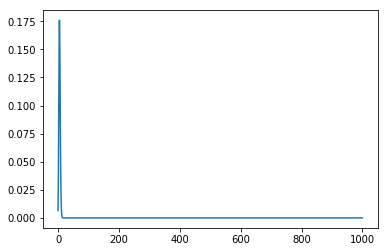

In [735]:
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline


#mean, var, skew, kurt = scs.binom.stats(1000, 0.005, moments='mvsk')
n=1000
p=0.005

probs_list = []
k_list = np.arange(0,n+1)
for i in k_list:
    prob = scs.binom.pmf(i, n, p)
    probs_list.append(prob)
    
fig, ax = plt.subplots(1, 1)
ax.plot(k_list,probs_list)

In [737]:
probs_list.index(max(probs_list))

5

In [741]:
sum(probs_list[10:])

0.031465238511286589

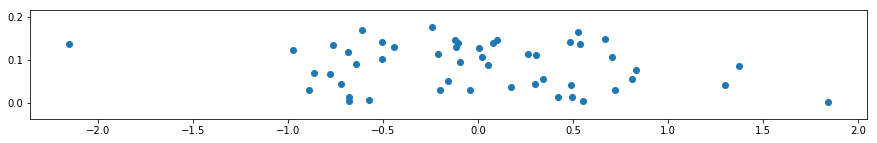

In [814]:
data=[-0.24525234,0.34258838,0.66512235,-2.15445321,1.30069225,0.42041963
,-0.67904514,0.2990795,-0.20201848,0.05410431,0.26106412,-0.89171509
,-0.15872403,0.83111975,-0.11941908,0.00667906,0.10079108,-0.60899067
,0.52596165,0.08029374,0.80668211,-0.10465914,-0.44508377,-0.76350006
,0.55267201,0.53581223,-0.68529436,-0.64163356,0.4809197,-0.97424692
,-0.12309056,0.30210824,-0.50851312,0.49089701,-0.5729919,1.84253363
,-0.77796115,0.49132436,-0.50516287,-0.09554953,0.70306746,0.17312964
,1.37490091,-0.72273023,-0.68162468,0.01836007,0.71899727,-0.86227295
,-0.04175399,-0.21037323]

plt.figure(figsize=(15,2))
plt.scatter(data,np.random.uniform(0,0.2,len(data)))


In [815]:
from scipy.stats import norm

def log_likelihood_normal_two_parameters(mu, sigma_sq, data_in):
    """
    Consume the parameters mu (mean) and sigma_sq (variance) of a normal
    distribution, and compute the likelihood of a fixed dataset (data_in).
    """
    normal = norm(mu, np.sqrt(sigma_sq))
    likelihoods = [normal.pdf(datum) for datum in data_in]
    return np.sum(np.log(likelihoods))

def minus_log_likelihood_normal_two_parameters(mu, sigma, data_in):
    return - log_likelihood_normal_two_parameters(mu, sigma, data_in)

from itertools import product

for mu, sigma_sq in product([-1, 0, 1], [0.5, 1, 2]):
    print("Log-Lik of Two Parameter Normal Model With mu={0}, sigma_sq={1}: {2:3.2f}".format(
        mu, sigma_sq, log_likelihood_normal_two_parameters(mu, sigma_sq, data))
    )

Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=0.5: -102.05
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=1: -82.66
Log-Lik of Two Parameter Normal Model With mu=-1, sigma_sq=2: -81.63
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=0.5: -52.85
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=1: -58.06
Log-Lik of Two Parameter Normal Model With mu=0, sigma_sq=2: -69.33
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=0.5: -103.64
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=1: -83.46
Log-Lik of Two Parameter Normal Model With mu=1, sigma_sq=2: -82.03


In [816]:
from scipy import optimize as optim
def wrapper_for_scipy(x):
    """
    The optimizer in scipy needs to consume a function that takes one numpy array
    as an argument, so this simple wrapper unpacks a two element array and passes
    the values into the log-likelihood. Similarly, the input data is taken in as
    a global variable.
    """
    return minus_log_likelihood_normal_two_parameters(x[0], x[1], data)

# the *maximum* log-likelihood is the one closest to zero,
# therefore: we want to *minimize* minus_log_likelihood
fit_parms = optim.minimize(wrapper_for_scipy, (0, 1), method='Nelder-Mead')
mu, sigma_sq = fit_parms.x

print("Log-Lik Optimal Parameters: mu = {0:2.3f}, sigma_sq = {1:2.3f}".format(mu, sigma_sq))

Log-Lik Optimal Parameters: mu = -0.008, sigma_sq = 0.484


In [818]:
fit_parms.x

array([-0.00797139,  0.48447302])

In [845]:
unif_data =  np.array([ 12.74150234,   7.48813381,  11.7510409 ,   5.93809414,
                         4.68964288,   3.70627976,   3.46101127,   6.41408594,
                        10.21747766,   8.71674398,   3.60720254,   9.65162582,
                         6.58295132,   7.31954815,   7.49708025,   5.66849976,
                         6.35144344,  12.08445868,   7.80220492,   9.83051264,
                        12.19963228,   3.59743489,  11.4528373 ,   5.77606004,
                        10.68932553,  10.41001181,  12.31509935,  12.31377402,
                         9.99084698,   5.64170829,   4.8600061 ,   3.83064209,
                         5.80984023,  11.87182268,   8.62335338,   5.27884731,
                        12.12025134,   4.35138826,   4.26284551,   6.70120651,
                        12.91554048,  10.58164179,  10.33635382,   9.18362962,
                         7.06904495,  10.03298992,   5.95876344,   6.05199525,
                        10.08473599,   9.1744051 ])
mu = np.mean(unif_data)
var = np.var(unif_data)
print("Sample Mean: {0:1.2f}".format(mu))
print("Sample Variance: {0:1.2f}".format(var))

a, b = mu - np.sqrt(3 * var), mu + np.sqrt(3 * var)

print("a = {0:2.2f}".format(a))
print("b = {0:2.2f}".format(b))

Sample Mean: 8.10
Sample Variance: 8.45
a = 3.07
b = 13.13


In [846]:
?scs.uniform.fit(unif_data)

In [848]:
data = np.array([ 12.1085187 ,  12.10867427,  11.21137858,  10.01311363,
                  10.79744224,  13.19280269,  12.44086123,  11.88810057,
                  10.70064104,  11.50382741])
scs.norm.fit(data)

(11.596536036, 0.89306888704493925)

In [850]:
mu,var = scs.norm.fit(data)
normal = scs.norm(mu,var)
normal.pdf(1)

1.1990651327597411e-31

In [851]:
def log_likelihood_normal_two_parameters(mu, sigma_sq, data_in):
    normal = scs.norm(mu,sigma_sq)
    return np.sum([np.log(normal.pdf(each)) for each in data_in])

In [856]:
from itertools import product

for mu, sigma_sq in product([10, 11, 12], [1, 1.1, 1.2]):
    print(mu,"\t", sigma_sq, "\t",log_likelihood_normal_two_parameters(mu, sigma_sq, data))

10 	 1 	 -25.9218820883
10 	 1.1 	 -23.970996846
10 	 1.2 	 -22.6323903141
11 	 1 	 -14.9565217283
11 	 1.1 	 -14.9087155568
11 	 1.2 	 -15.0175567307
12 	 1 	 -13.9911613683
12 	 1.1 	 -14.1108970774
12 	 1.2 	 -14.3471675918


In [ ]:
27213 visitors, out of a total of 108879, clicked the button. If you assume that the pr

In [870]:
p = 56330/226977
#var = 56330*(1-56330/226977)

#binomal = scs.binom(108879,p)
scs.binom.pmf(27213,108879,p)
scs.binom.cdf(27213,108879,p)

0.9114657587436571

array([ 26503.  ,  26513.06,  26523.12,  26533.18,  26543.24,  26553.3 ,
        26563.36,  26573.42,  26583.48,  26593.54,  26603.6 ,  26613.66,
        26623.72,  26633.78,  26643.84,  26653.9 ,  26663.96,  26674.02,
        26684.08,  26694.14,  26704.2 ,  26714.26,  26724.32,  26734.38,
        26744.44,  26754.5 ,  26764.56,  26774.62,  26784.68,  26794.74,
        26804.8 ,  26814.86,  26824.92,  26834.98,  26845.04,  26855.1 ,
        26865.16,  26875.22,  26885.28,  26895.34,  26905.4 ,  26915.46,
        26925.52,  26935.58,  26945.64,  26955.7 ,  26965.76,  26975.82,
        26985.88,  26995.94,  27006.  ,  27016.06,  27026.12,  27036.18,
        27046.24,  27056.3 ,  27066.36,  27076.42,  27086.48,  27096.54,
        27106.6 ,  27116.66,  27126.72,  27136.78,  27146.84,  27156.9 ,
        27166.96,  27177.02,  27187.08,  27197.14,  27207.2 ,  27217.26,
        27227.32,  27237.38,  27247.44,  27257.5 ,  27267.56,  27277.62,
        27287.68,  27297.74,  27307.8 ,  27317.86, 

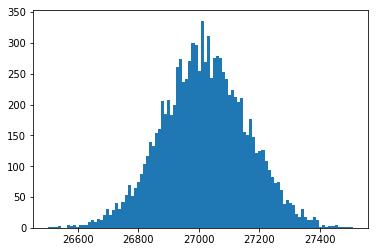

In [903]:
data_1d = scs.binom.rvs(108879,p,size=10000)
data_1d = sorted(data_1d)
x = plt.hist(data_1d,bins=100)
x[1]
#plt.plot(x[1][:-1],x[0])

In [907]:
scs.binom.

Object `scs.binom.fit` not found.
